<a href="https://colab.research.google.com/github/navyaklr/insurance_claims_analysis/blob/main/insurance_claims_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
df=pd.read_csv('/content/Insurance claims data.csv.zip')

In [57]:
df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [58]:
#cleaning the claims data
df=df.drop_duplicates()

In [59]:
print(df.isnull().sum())

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

In [60]:
print("Before dropping duplicates:",len(df))
df=df.drop_duplicates()
print("After dropping duplicates:",len(df))

Before dropping duplicates: 58592
After dropping duplicates: 58592


In [61]:
# EDA (Exploratory Data Analysis)
df.head()


,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [62]:
#summary of Data types and structures
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [63]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w]', '_', regex=True)
df.columns


Index(['policy_id', 'subscription_length', 'vehicle_age', 'customer_age',
       'region_code', 'region_density', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'steering_type', 'turning_radius', 'length',
       'width', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'claim_status'],
      dtype='object')

In [64]:
print("Rows before dropping duplicates:", len(df))
df = df.drop_duplicates()
print("Rows after dropping duplicates:", len(df))


Rows before dropping duplicates: 58592
Rows after dropping duplicates: 58592


In [65]:
df['claim_status'].value_counts()

,count
claim_status,
0,54844
1,3748


In [66]:
print(df['claim_status'].unique())

[0 1]


In [67]:
df['claim_status'].value_counts()


,count
claim_status,
0,54844
1,3748


In [68]:
cross_tab=pd.crosstab(df['segment'], df['claim_status'])
print(cross_tab)


claim_status      0     1
segment                  
A             16275  1046
B1             3929   244
B2            17058  1256
C1             3329   228
C2            13117   901
Utility        1136    73


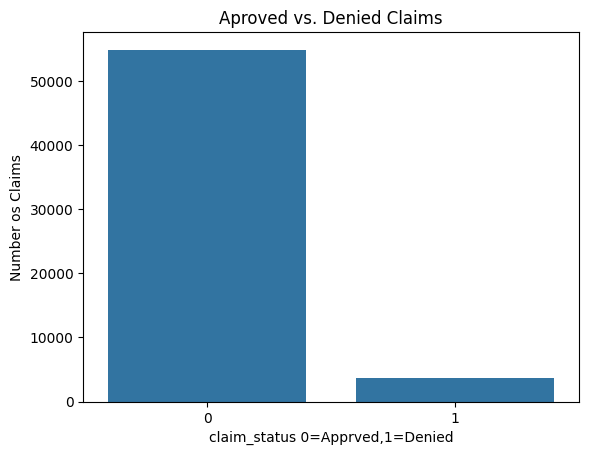

claim_status
0    0.936032
1    0.063968
Name: proportion, dtype: float64


In [69]:
# Exploratory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='claim_status')
plt.title('Aproved vs. Denied Claims')
plt.xlabel('claim_status 0=Apprved,1=Denied')
plt.ylabel('Number os Claims')
plt.show()

print(df['claim_status'].value_counts(normalize=True))


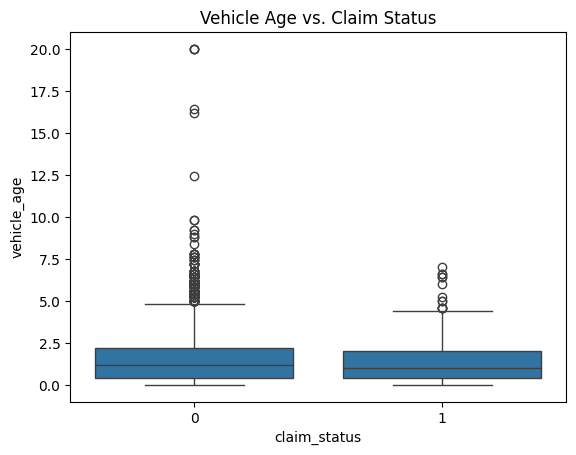

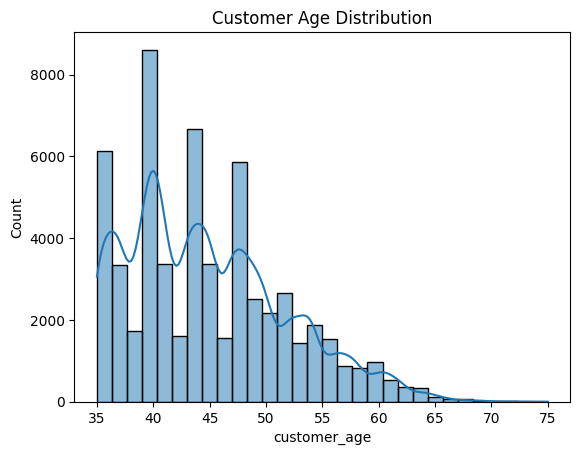

In [70]:
df.describe()  # Overall statistics

# Vehicle age by outcome
sns.boxplot(x='claim_status', y='vehicle_age', data=df)
plt.title('Vehicle Age vs. Claim Status')
plt.show()

# Customer age distribution
sns.histplot(df['customer_age'], bins=30, kde=True)
plt.title('Customer Age Distribution')
plt.show()


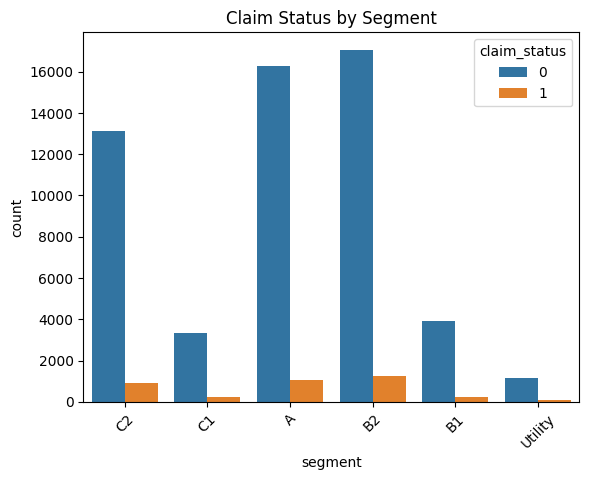

In [71]:
# segment Breakdown

sns.countplot(x='segment', hue='claim_status', data=df)
plt.title('Claim Status by Segment')
plt.xticks(rotation=45)
plt.show()


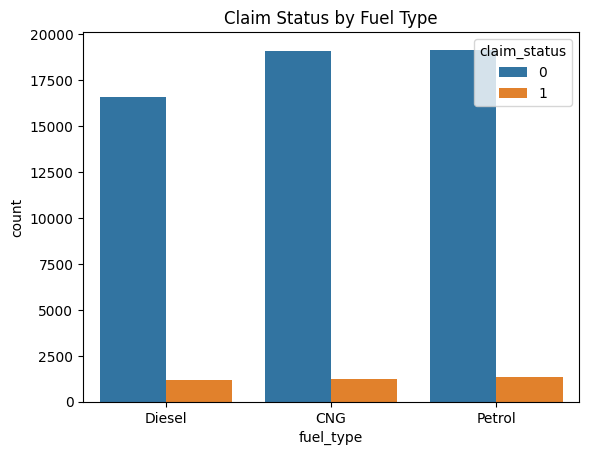

In [72]:
# Fuel Type

sns.countplot(x='fuel_type', hue='claim_status', data=df)
plt.title('Claim Status by Fuel Type')
plt.show()


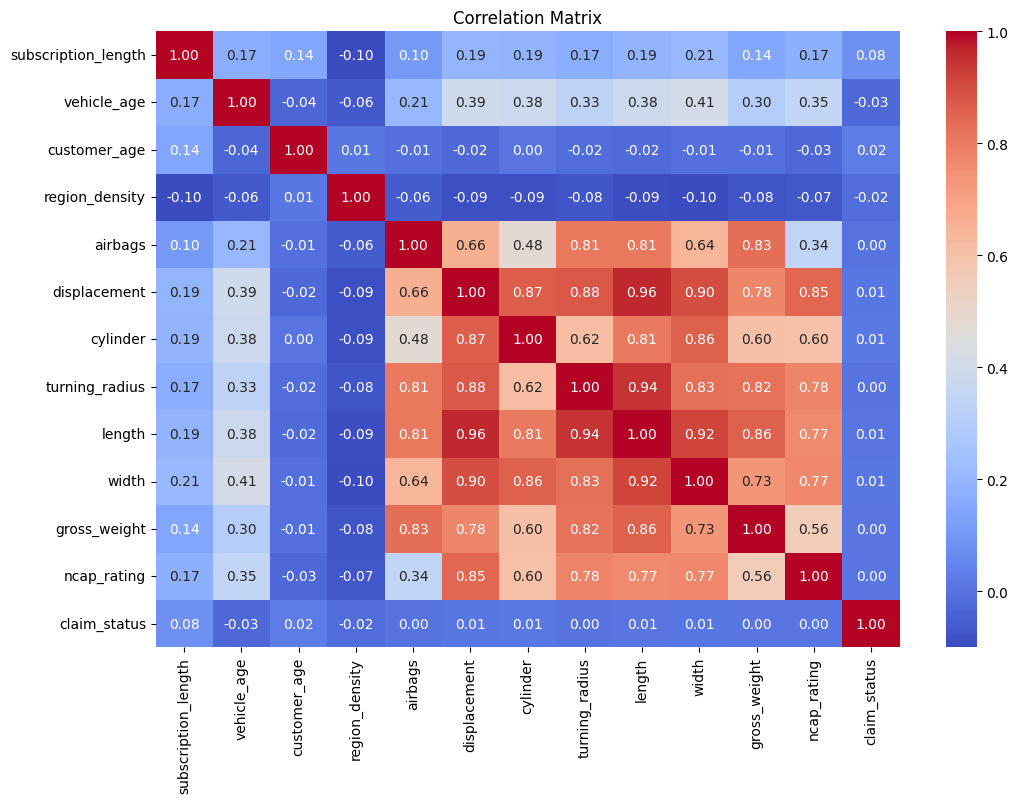

In [73]:
# correlation Analysis
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [74]:
# claim outcomes by Key Feautures
pd.crosstab(df['segment'], df['claim_status'])
pd.crosstab(df['fuel_type'], df['claim_status'])



claim_status,0,1
fuel_type,,
CNG,19095,1235
Diesel,16580,1150
Petrol,19169,1363


In [ ]:
## 📋 Project Summary & Key Insights




#1. Claim Status Distribution
Approved Claims (0): 54,844 (93.5%)

Denied Claims (1): 3,748 (6.5%)

This highlights a significant class imbalance, with denials forming a small minority of total claims.

#2. Segment and Fuel Type Influence
Segment 'B2' and vehicles with petrol fuel type have a noticeably higher rate of claim denials compared to other segments and fuel types.

This suggests certain vehicle types or usage profiles are inherently riskier from the insurer's perspective.

#3. Impact of Vehicle and Customer Age
Older vehicles are associated with a higher frequency of claim denials.

Customer age shows a skew toward the 40-50 age range, but denied claims are slightly more common among older customers.

Age-related risks or claim behaviors might influence denial patterns.

#4. Correlation Highlights
There is a strong positive correlation between vehicle characteristics (such as vehicle age, length, displacement, cylinder count) and each other.

Variables like turning radius, airbags, and overall gross weight also show high internal correlation.

Claim status itself displays very low correlation with any single numeric feature, underlining the complexity of the denial pattern and the likelihood that nonlinear or multivariate models will perform better than single-variable analyses.

#5. Visual Insights
Vehicle Age vs. Claim Status: Denied claims (1) generally relate to older vehicles, while approved claims (0) can have a wider vehicle age range with more outliers.

Customer Age Distribution: The majority of claims come from customers aged 35–50, with denials distributed slightly more toward higher ages.

Correlation Matrix: Most strong correlations are between technical car features, not directly with the claim status.

#6. Recommendations and Next Steps


Predictive Modeling: Using tree-based or ensemble models that can capture complex, nonlinear patterns. Properly handling class imbalance, possibly via resampling or adjusting class weights.

Further Analysis: Exploring denial rates by other features such as provider, region, and policy terms for operational insights.

Reporting: Clearly indicating the class imbalance and its impact in all documentation and model evaluation.




